In [2]:
#import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [5]:
#reading the dataset
data = pd.read_csv('/content/data.csv')

data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,3,9085,1,1,134.0,1,37,38,...,0,5,8,5,12.600000,0,9.4,-0.8,-3.12,Enrolled
1,1,17,2,9254,1,1,128.0,1,38,38,...,0,6,7,5,14.600000,0,11.1,0.6,2.02,Graduate
2,1,1,1,9070,1,1,125.0,1,1,1,...,0,6,11,4,10.833333,0,13.9,-0.3,0.79,Enrolled
3,1,7,2,9085,1,3,130.0,1,3,3,...,0,4,10,0,0.000000,4,10.8,1.4,1.74,Dropout
4,1,1,2,9500,1,1,135.0,1,37,1,...,0,8,12,7,11.721429,0,12.7,3.7,-1.70,Graduate


In [6]:
X = data.drop('Target', axis=1)
y = data['Target']

#applying onehotencoder
y_array = y.to_numpy().reshape(-1, 1)

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y_array).toarray()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Adding the desired layers to our model

In [64]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dropout(0.3)) # dropout rate = 0.3

model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # dropout rate = 0.3

model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # dropout rate = 0.3

model.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))

Compiling model

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model fitting step

In [66]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=20)

Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 0.9487 - accuracy: 0.5677 - val_loss: 665.4076 - val_accuracy: 0.4599
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.7002 - val_loss: 250.9057 - val_accuracy: 0.4599
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.7197 - val_loss: 657.1265 - val_accuracy: 0.3414
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.7305 - val_loss: 1204.8142 - val_accuracy: 0.3414
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.7397 - val_loss: 1833.3577 - val_accuracy: 0.3465
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7445 - val_loss: 2751.9548 - val_accuracy: 0.3439
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7502 - val_loss: 2919.9756 - va

Text(0, 0.5, 'Accuracy [%]')

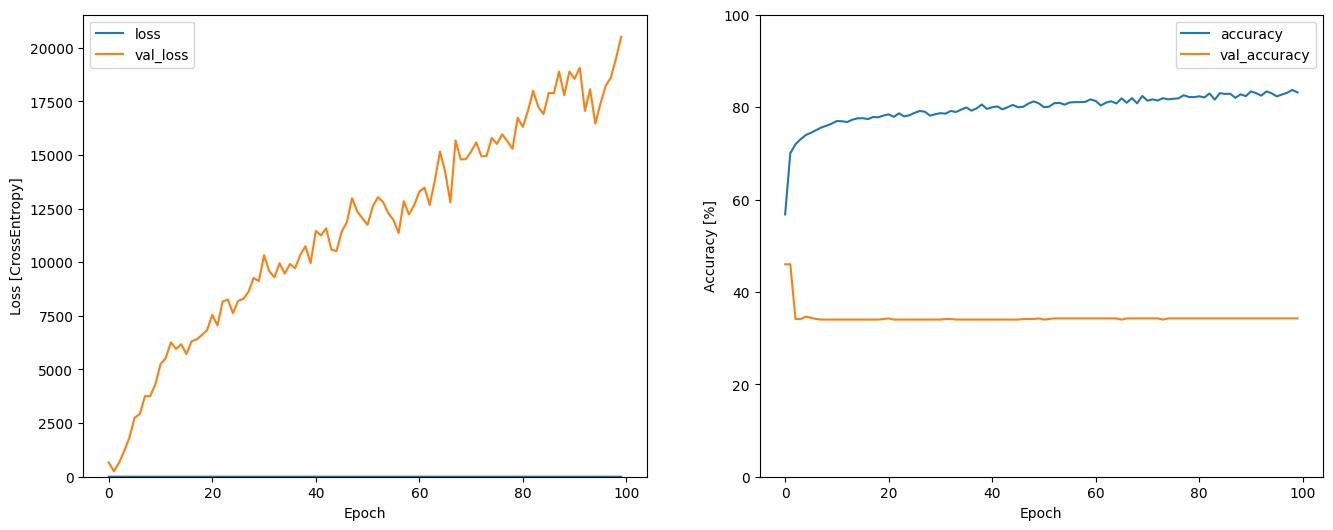

In [67]:
#Plotting Loss values for training and validation
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

#Plotting Accuracy values for training and validation
plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

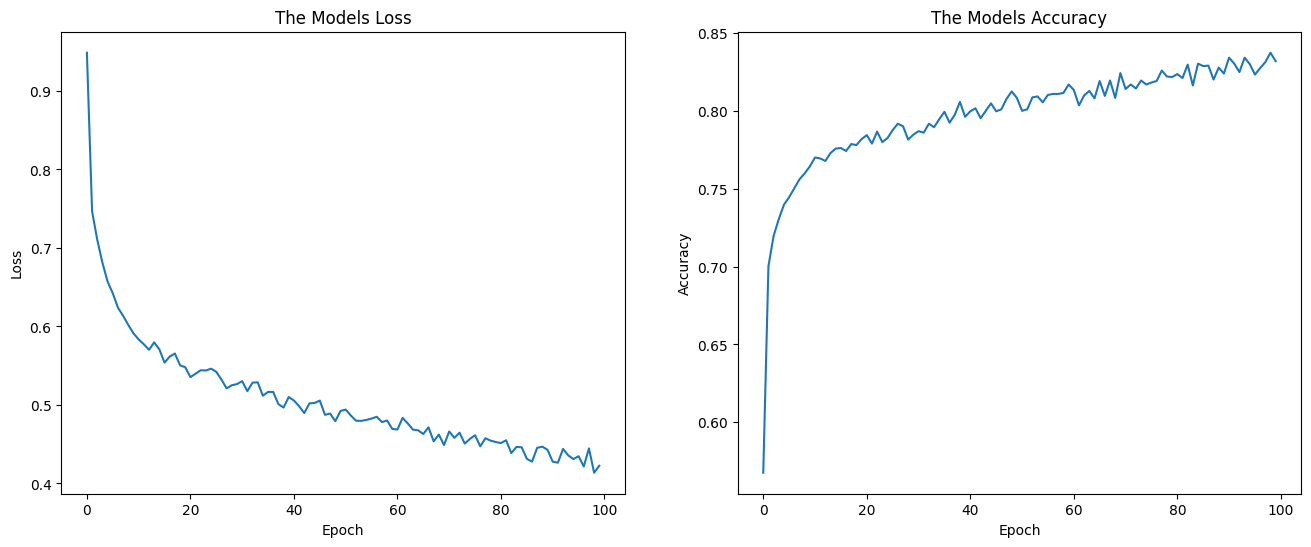

In [68]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('The Models Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('The Models Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()